# **McCulloch-Pitts vs. Perceptron Neurons - Differentiation**

#Introduction:
McCulloch-Pitts Neuron and Perceptron are both early models of neural networks, but they differ in their complexity and learning capabilities.
- McCulloch-Pitts Neuron: A simple binary neuron that outputs 1 if the sum of inputs exceeds a threshold; otherwise, it outputs 0.
- Perceptron: A more advanced binary classifier that updates its weights based on the input-output difference through a learning rule.

#**Definitions and Formulae**
# 1. McCulloch-Pitts Neuron:
- Summation Function: S = Σ(Xi), where Xi are inputs.
- Threshold Function: Output = 1 if S >= threshold, else 0.

# 2. Perceptron Neuron:
- Summation Function: S = Σ(Wi * Xi), where Wi are weights and Xi are inputs.
- Activation Function: Output = 1 if S >= 0 (using a bias term), else 0.
- Learning Rule: Wi = Wi + α * (desired_output - predicted_output) * Xi (where α is the learning rate).

Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

McCulloch-Pitts Neuron Implementation for AND Gate

In [2]:
def mcp_neuron(inputs, threshold):
    """
    Implements the McCulloch-Pitts neuron.
    :param inputs: Binary input array
    :param threshold: Activation threshold
    :return: Binary output (0 or 1)
    """
    summation = np.sum(inputs)  # Summing up the input values
    return 1 if summation >= threshold else 0  # Thresholding function

McCulloch-Pitts AND Gate Inputs and Expected Outputs

In [3]:
X_mcp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input combinations
y_true_mcp = np.array([0, 0, 0, 1])  # Expected outputs for AND gate
threshold_mcp = 2  # Threshold for McCulloch-Pitts neuron

Compute McCulloch-Pitts Predictions

In [4]:
y_pred_mcp = np.array([mcp_neuron(x, threshold_mcp) for x in X_mcp])

Display McCulloch-Pitts predictions

In [5]:
print("McCulloch-Pitts Neuron Predictions:")
print("Inputs: ", X_mcp)
print("Predictions: ", y_pred_mcp)
print("Expected Outputs: ", y_true_mcp)

McCulloch-Pitts Neuron Predictions:
Inputs:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:  [0 0 0 1]
Expected Outputs:  [0 0 0 1]


Perceptron Neuron Implementation for AND Gate

In [6]:
def perceptron_neuron(inputs, weights, bias):
    """
    Implements the Perceptron neuron.
    :param inputs: Binary input array
    :param weights: Weights corresponding to each input
    :param bias: Bias term
    :return: Binary output (0 or 1)
    """
    summation = np.dot(inputs, weights) + bias  # Weighted sum + bias
    return 1 if summation >= 0 else 0  # Thresholding function

Perceptron Neuron Learning Rule (Training)

In [7]:
def train_perceptron(X, y, epochs=10, learning_rate=0.1):
    """
    Trains the Perceptron using the learning rule.
    :param X: Input data
    :param y: Expected output
    :param epochs: Number of training iterations
    :param learning_rate: Learning rate
    :return: Updated weights and bias
    """
    weights = np.zeros(X.shape[1])  # Initialize weights
    bias = 0  # Initialize bias

    for epoch in range(epochs):
        for i in range(len(X)):
            output = perceptron_neuron(X[i], weights, bias)  # Predict output
            error = y[i] - output  # Calculate error
            weights += learning_rate * error * X[i]  # Update weights
            bias += learning_rate * error  # Update bias

    return weights, bias

Train Perceptron on AND Gate Data

In [8]:
X_perceptron = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input combinations for AND gate
y_true_perceptron = np.array([0, 0, 0, 1])  # Expected outputs for AND gate

Train the perceptron

In [9]:
weights, bias = train_perceptron(X_perceptron, y_true_perceptron)

Display Perceptron predictions

In [10]:
y_pred_perceptron = np.array([perceptron_neuron(x, weights, bias) for x in X_perceptron])

print("\nPerceptron Neuron Predictions after Training:")
print("Inputs: ", X_perceptron)
print("Predictions: ", y_pred_perceptron)
print("Expected Outputs: ", y_true_perceptron)
print("Final Weights: ", weights)
print("Final Bias: ", bias)


Perceptron Neuron Predictions after Training:
Inputs:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predictions:  [0 0 0 1]
Expected Outputs:  [0 0 0 1]
Final Weights:  [0.2 0.1]
Final Bias:  -0.20000000000000004


# Plotting for Comparison (McCulloch-Pitts vs. Perceptron)

Create a plot showing how the neurons' decision boundaries differ

Define decision boundary for McCulloch-Pitts Neuron (threshold = 2, simple sum)

In [11]:
x_values_mcp = np.linspace(-1, 2, 100)
y_values_mcp = 2 - x_values_mcp

Define decision boundary for Perceptron (after training)

In [12]:
x_values_perceptron = np.linspace(-1, 2, 100)
y_values_perceptron = (-weights[0] * x_values_perceptron - bias) / weights[1]

Create the plot

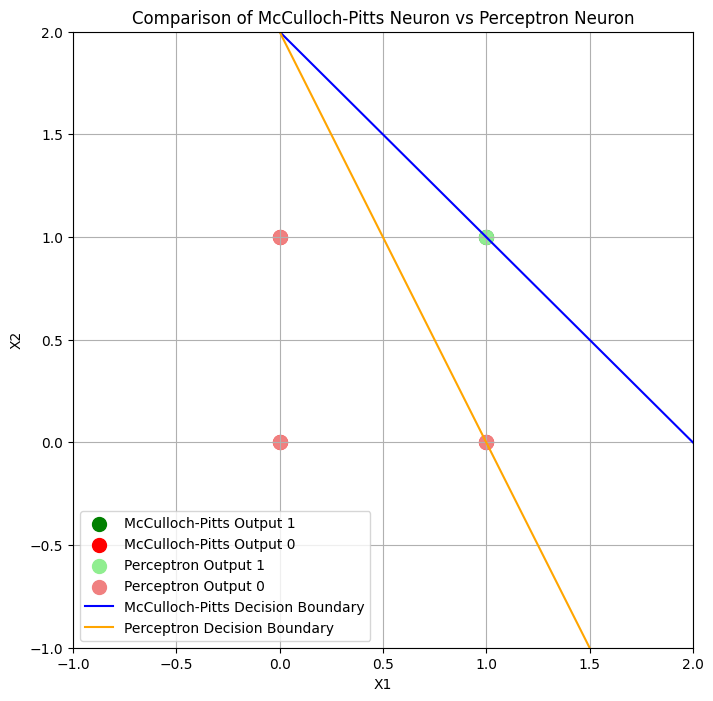

In [14]:
# Create the plot
plt.figure(figsize=(8, 8))

# Plot McCulloch-Pitts Neuron results: Green for output 1, Red for output 0
plt.scatter(X_mcp[y_true_mcp == 1][:, 0], X_mcp[y_true_mcp == 1][:, 1], color='green', label='McCulloch-Pitts Output 1', s=100)
plt.scatter(X_mcp[y_true_mcp == 0][:, 0], X_mcp[y_true_mcp == 0][:, 1], color='red', label='McCulloch-Pitts Output 0', s=100)

# Plot Perceptron results: Green for output 1, Red for output 0
plt.scatter(X_perceptron[y_true_perceptron == 1][:, 0], X_perceptron[y_true_perceptron == 1][:, 1], color='lightgreen', label='Perceptron Output 1', s=100)
plt.scatter(X_perceptron[y_true_perceptron == 0][:, 0], X_perceptron[y_true_perceptron == 0][:, 1], color='lightcoral', label='Perceptron Output 0', s=100)

# Plot decision boundaries
plt.plot(x_values_mcp, y_values_mcp, color='blue', label='McCulloch-Pitts Decision Boundary')
plt.plot(x_values_perceptron, y_values_perceptron, color='orange', label='Perceptron Decision Boundary')

# Adding labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Comparison of McCulloch-Pitts Neuron vs Perceptron Neuron')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()